# Анализ категорий в JSON файлах

Этот скрипт анализирует категории из JSON файлов, подсчитывает их количество и визуализирует результаты.

In [1]:
!pip install matplotlib numpy

## Импорт библиотек

In [2]:
import json
import os
import numpy as np
from typing import Dict
import matplotlib.pyplot as plt
from collections import Counter

## Функции для обработки данных

In [3]:
def process_file(file_path: str) -> Counter:
    """
    Подсчитывает количество категорий в JSON файле.

    Args:
        file_path (str): Путь к JSON файлу для анализа.

    Returns:
        Counter: Счетчик категорий в файле.
    """
    with open(file_path, "r", encoding="utf-8") as file:
        data = json.load(file)

    # Отбираем записи, где присутствует текст, и ограничиваем их 1000 записями
    data = [item for item in data if item.get("text")]
    data = data[:1000]

    # Извлекаем категории из данных, игнорируя пустые или отсутствующие
    categories = [item["category"] for item in data if item.get("category")]
    return Counter(categories)

In [4]:
def plot_grid(file_stats: Dict[str, Counter], cols: int = 3) -> None:
    """
    Строит сетку графиков для отображения статистики по категориям для каждого файла.

    Args:
        file_stats (Dict[str, Counter]): Словарь, где ключи — имена файлов, а значения — счетчики категорий.
        cols (int): Количество столбцов в сетке. По умолчанию 3.
    """
    num_files = len(file_stats)
    rows = (num_files + cols - 1) // cols  # Вычисляем количество строк в сетке

    # Создаем фигуру с подграфиками
    fig, axes = plt.subplots(rows, cols, figsize=(20, 5 * rows))
    axes = axes.flatten()  # Преобразуем в 1D массив для удобного обхода

    # Для каждого файла строим бар-чарт
    for i, (json_file, category_counts) in enumerate(file_stats.items()):
        ax = axes[i]
        colors = plt.cm.tab10(np.linspace(0, 1, len(category_counts)))
        ax.bar(category_counts.keys(), category_counts.values(), color=colors, zorder=2)
        ax.set_title(f"Категории в {json_file}")
        ax.set_xlabel("Категория")
        ax.set_ylabel("Количество")
        ax.tick_params(axis='x', rotation=45)
        ax.grid(True, which='both', linestyle='--', linewidth=0.5, zorder=1)

    # Удаляем лишние подграфики, если их больше, чем файлов
    for i in range(len(file_stats), len(axes)):
        fig.delaxes(axes[i])

    plt.tight_layout()  # Оптимизация расположения графиков
    plt.show()

## Обработка JSON файлов и построение графиков

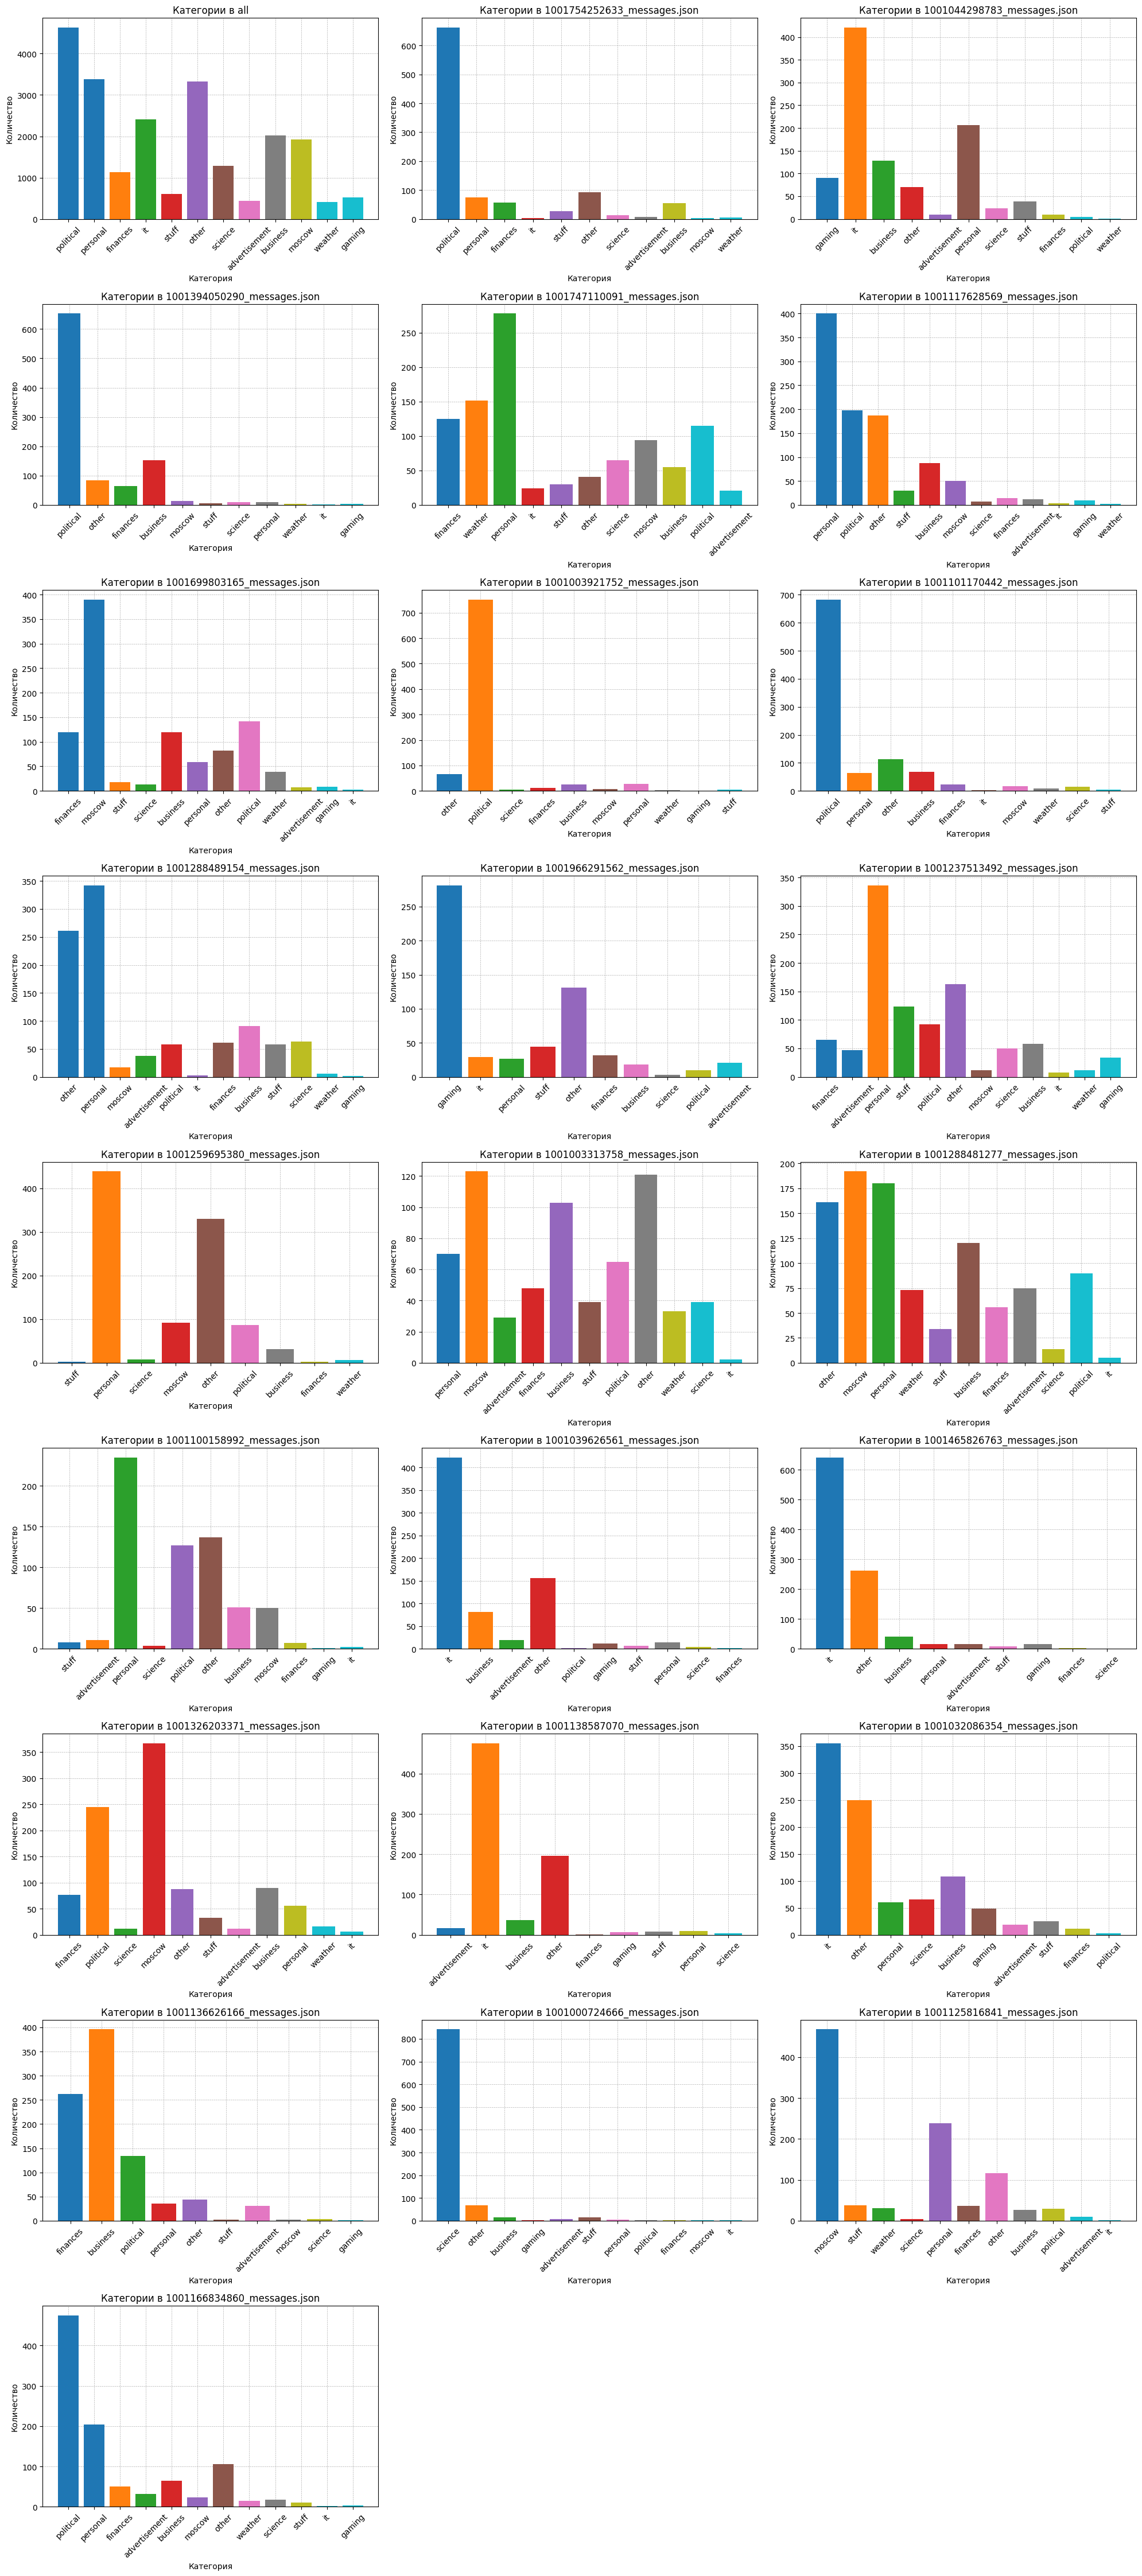

In [5]:
# Получаем список всех JSON файлов в указанной директории
json_files = [file for file in os.listdir("data/") if file.endswith(".json")]

# Словарь для хранения статистики по каждому файлу
file_stats: Dict[str, Counter] = {}
file_stats["all"] = Counter()

# Обрабатываем каждый файл и добавляем статистику
for json_file in json_files:
    category_counts = process_file(f"data/{json_file}")
    file_stats[json_file] = category_counts
    file_stats["all"] += category_counts  # Добавляем статистику по всем файлам

# Строим графики для всех файлов
plot_grid(file_stats, cols=3)